## Ève Castonguay, UQAM - Laboratoire 3, expérience 2
### Créé le 03/10/2025

# Partie III: climat du système chaotique

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplot, ylabel, xlabel
import seaborn as sns
import scipy

plt.rcParams["text.usetex"] = True

#### 3.1) Exploration visuelle des différences

Moyennes pour x (contrôle & perturbé)
1.33
-0.08
Moyennes pour y (contrôle & perturbé)
1.32
-0.09
Moyennes pour z (contrôle & perturbé)
23.88
23.78


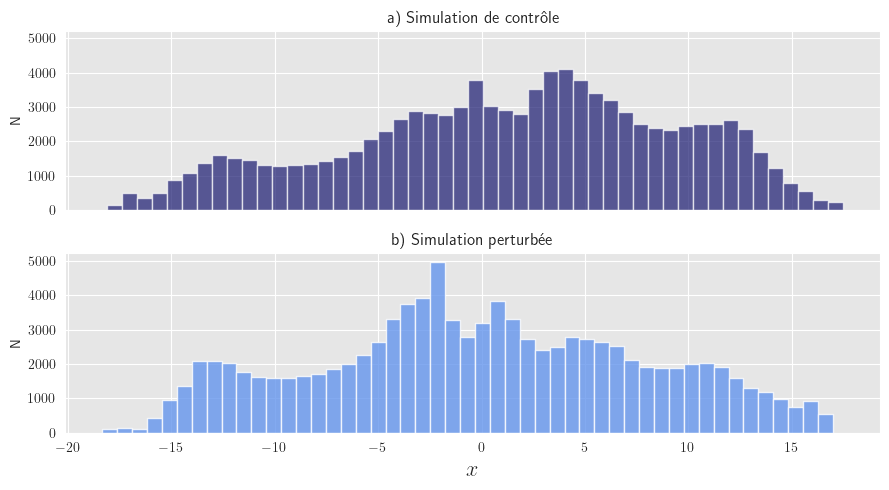

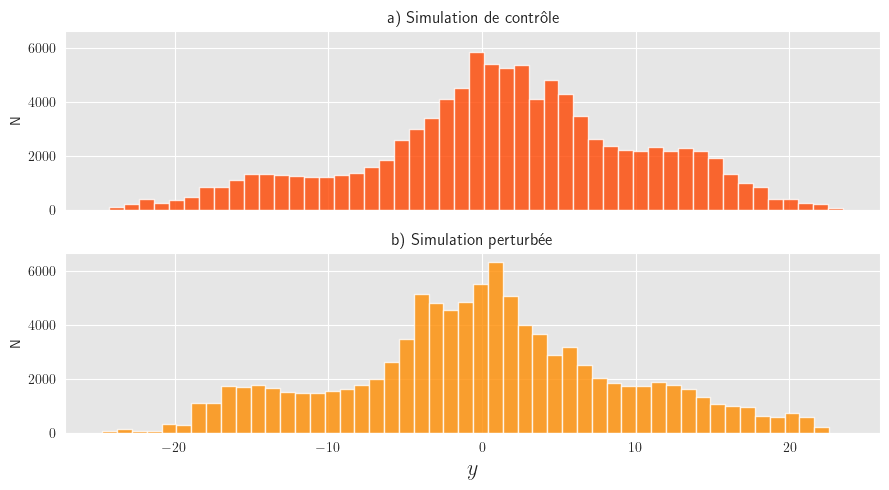

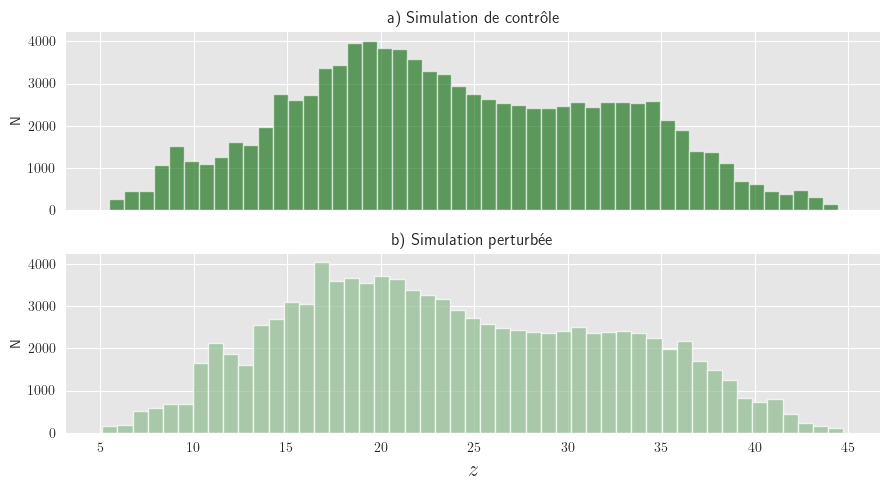

In [3]:
## 1) valeurs des constantes
sigma = 10
rho = 28
beta = 2.667
epsilon = 0.01
eta = np.sqrt(beta*(rho-1))
pas_de_temps = 0.001
n_pas_de_temps = 1e5

## 2) préparation des trois planches
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig1, ax1 = plt.subplots(2, 1, figsize=(9, 5), sharex=True, sharey=True)
fig2, ax2 = plt.subplots(2,1, figsize=(9, 5), sharex=True, sharey=True)
fig3, ax3 = plt.subplots(2,1, figsize=(9, 5), sharex=True, sharey=True)

## 3) solution contrôle
# calculer valeurs initiales des variables dépendantes
x_0 = eta
y_0 = eta + 3
z_0 = rho - 1

# utilisation des équations discrétisées
valeurs_t = np.arange(0,pas_de_temps*n_pas_de_temps,pas_de_temps) # ndarray
valeurs_x_ct = np.array([x_0]) # ndarray
valeurs_y_ct = np.array([y_0])
valeurs_z_ct = np.array([z_0])

for i in range(len(valeurs_t)-1):
    x_p_1 = (sigma*(valeurs_y_ct[i]-valeurs_x_ct[i]))*pas_de_temps+valeurs_x_ct[i]
    y_p_1 = (valeurs_x_ct[i]*(rho-valeurs_z_ct[i])-valeurs_y_ct[i])*pas_de_temps+valeurs_y_ct[i]
    z_p_1 = (valeurs_y_ct[i]*valeurs_x_ct[i]-beta*valeurs_z_ct[i])*pas_de_temps+valeurs_z_ct[i]

    valeurs_x_ct = np.append(valeurs_x_ct,x_p_1)
    valeurs_y_ct = np.append(valeurs_y_ct,y_p_1)
    valeurs_z_ct = np.append(valeurs_z_ct,z_p_1)

## 4) solution perturbée
# calculer valeurs initiales des variables dépendantes
x_0 = eta + epsilon
y_0 = eta + 3
z_0 = rho - 1

# utilisation des équations discrétisées
valeurs_x_pt = np.array([x_0]) # ndarray
valeurs_y_pt = np.array([y_0])
valeurs_z_pt = np.array([z_0])

for i in range(len(valeurs_t)-1):
    x_p_1 = (sigma*(valeurs_y_pt[i]-valeurs_x_pt[i]))*pas_de_temps+valeurs_x_pt[i]
    y_p_1 = (valeurs_x_pt[i]*(rho-valeurs_z_pt[i])-valeurs_y_pt[i])*pas_de_temps+valeurs_y_pt[i]
    z_p_1 = (valeurs_y_pt[i]*valeurs_x_pt[i]-beta*valeurs_z_pt[i])*pas_de_temps+valeurs_z_pt[i]

    valeurs_x_pt = np.append(valeurs_x_pt,x_p_1)
    valeurs_y_pt = np.append(valeurs_y_pt,y_p_1)
    valeurs_z_pt = np.append(valeurs_z_pt,z_p_1)

## 5) histogrammes pour x
# contrôle
step = np.absolute(np.max(valeurs_x_ct)-np.min(valeurs_x_ct))/50
my_bins = np.arange(np.min(valeurs_x_ct),np.max(valeurs_x_ct),step)
ax1[0].hist(valeurs_x_ct, bins=my_bins, color='midnightblue', alpha=0.7)

# pertubé
step = np.absolute(np.max(valeurs_x_pt)-np.min(valeurs_x_pt))/50
my_bins = np.arange(np.min(valeurs_x_pt),np.max(valeurs_x_pt),step)
ax1[1].hist(valeurs_x_pt, bins=my_bins, color='cornflowerblue', alpha=0.8)

## 6) histogrammes pour y
# contrôle
step = np.absolute(np.max(valeurs_y_ct)-np.min(valeurs_y_ct))/50
my_bins = np.arange(np.min(valeurs_y_ct),np.max(valeurs_y_ct),step)
ax2[0].hist(valeurs_y_ct, bins=my_bins, color='orangered', alpha=0.8)

# pertubé
step = np.absolute(np.max(valeurs_y_pt)-np.min(valeurs_y_pt))/50
my_bins = np.arange(np.min(valeurs_y_pt),np.max(valeurs_y_pt),step)
ax2[1].hist(valeurs_y_pt, bins=my_bins, color='darkorange', alpha=0.8)

## 7) histogrammes pour z
# contrôle
step = np.absolute(np.max(valeurs_z_ct)-np.min(valeurs_z_ct))/50
my_bins = np.arange(np.min(valeurs_z_ct),np.max(valeurs_z_ct),step)
ax3[0].hist(valeurs_z_ct, bins=my_bins, color='darkgreen', alpha=0.6)

# pertubé
step = np.absolute(np.max(valeurs_z_pt)-np.min(valeurs_z_pt))/50
my_bins = np.arange(np.min(valeurs_z_pt),np.max(valeurs_z_pt),step)
ax3[1].hist(valeurs_z_pt, bins=my_bins, color='darkseagreen', alpha=0.7)

## 8) donner un nom aux axes et sauvegarder les graphes
# pour x
ax1[0].set(title=r"a) Simulation de contrôle", ylabel="N")
ax1[1].set(title=r"b) Simulation perturbée", xlabel=r"$x$", ylabel="N")
ax1[1].set_xlabel(xlabel=r"$x$", fontsize=16)
fig1.tight_layout()
fig1.savefig('/Users/evecastonguay/Desktop/Labo/E_02/Figures/climat1.png',dpi=500)
# pour y
ax2[0].set(title=r"a) Simulation de contrôle", ylabel="N")
ax2[1].set(title=r"b) Simulation perturbée", ylabel="N")
ax2[1].set_xlabel(xlabel=r"$y$", fontsize=16)
fig2.tight_layout()
fig2.savefig('/Users/evecastonguay/Desktop/Labo/E_02/Figures/climat2.png',dpi=500)
# pour z
ax3[0].set(title=r"a) Simulation de contrôle", ylabel="N")
ax3[1].set(title=r"b) Simulation perturbée", ylabel="N")
ax3[1].set_xlabel(xlabel=r"$z$", fontsize=16)
fig3.tight_layout()
fig3.savefig('/Users/evecastonguay/Desktop/Labo/E_02/Figures/climat3.png',dpi=500)

## 9) calculer les moyennes
print("Moyennes pour x (contrôle & perturbé)")
print(round(np.mean(valeurs_x_ct),2))
print(round(np.mean(valeurs_x_pt),2))
print("Moyennes pour y (contrôle & perturbé)")
print(round(np.mean(valeurs_y_ct),2))
print(round(np.mean(valeurs_y_pt),2))
print("Moyennes pour z (contrôle & perturbé)")
print(round(np.mean(valeurs_z_ct),2))
print(round(np.mean(valeurs_z_pt),2))

plt.show()

#### 3.2) Exploration statistique des différences

In [13]:
# avoir roulé 3.1) avant!

## 1) test Kolmogorov-Smirnov (basé sur la différence maximale entre un élément de la distribution de contrôle et son homologue dans la distribution perturbée)
# pour x
ks_x = scipy.stats.ks_2samp(valeurs_x_ct, valeurs_x_pt)
print("Kolmogorov-Smirnov pour x: ", ks_x)
# pour y
ks_y = scipy.stats.ks_2samp(valeurs_y_ct, valeurs_y_pt)
print("Kolmogorov-Smirnov pour y: ", ks_y)
# pour z
ks_z = scipy.stats.ks_2samp(valeurs_z_ct, valeurs_z_pt)
print("Kolmogorov-Smirnov pour z: ", ks_z)

## 2) test Mann-Whitney U (basé sur le rang des éléments dans chaque distribution)
# pour x
print("Mann-Whitney U pour x: ",scipy.stats.mannwhitneyu(valeurs_x_ct, valeurs_x_pt))
# pour y
print("Mann-Whitney U pour y: ",scipy.stats.mannwhitneyu(valeurs_y_ct, valeurs_y_pt))
# pour z
print("Mann-Whitney U pour z: ",scipy.stats.mannwhitneyu(valeurs_z_ct, valeurs_z_pt))


Kolmogorov-Smirnov pour x:  KstestResult(statistic=np.float64(0.11601000000000006), pvalue=np.float64(0.0), statistic_location=np.float64(2.070283192592099), statistic_sign=np.int8(-1))
Kolmogorov-Smirnov pour y:  KstestResult(statistic=np.float64(0.10584000000000005), pvalue=np.float64(0.0), statistic_location=np.float64(1.78416649497121), statistic_sign=np.int8(-1))
Kolmogorov-Smirnov pour z:  KstestResult(statistic=np.float64(0.026980000000000004), pvalue=np.float64(4.732168406167034e-32), statistic_location=np.float64(17.74073409304105), statistic_sign=np.int8(-1))
Mann-Whitney U pour x:  MannwhitneyuResult(statistic=np.float64(5557521474.0), pvalue=np.float64(0.0))
Mann-Whitney U pour y:  MannwhitneyuResult(statistic=np.float64(5537390925.5), pvalue=np.float64(0.0))
Mann-Whitney U pour z:  MannwhitneyuResult(statistic=np.float64(5058374678.5), pvalue=np.float64(6.135313225408862e-06))
